In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Question 1

Ways to get 2: (1 + 1) <br>
Ways to get 7: (1 + 6) (2 + 5) (3 + 4) (4 + 3) (5 + 2) (6 + 1)

7 is more probable. <br>
Ratio of probabilities is 1:6

# Question 2

Prob_2 = 1/6 * 1/6 = 1/36 <br>
Prob_3 = 1/6 * 1/6 + 1/6 * 1/6 = 2/36 <br>
Prob_4 = 1/6 * 1/6 * 3 = 3/36 <br>
Prob_5 = 1/6 * 1/6 * 4 = 4/36 <br>
Prob_6 = 1/6 * 1/6 * 5 = 5/36 <br>
Prob_7 = 1/6 * 1/6 * 6 = 6/36 <br>
Prob_8 = 1/6 * 1/6 * 5 = 5/36 <br>
Prob_9 = 1/6 * 1/6 * 4 = 4/36 <br>
Prob_10 = 1/6 * 1/6 * 3 = 3/36 <br>
Prob_11 = 1/6 * 1/6 * 2 = 2/36 <br>
Prob_12 = 1/6 * 1/6 = 1/36 <br>

In [2]:
dice_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
sums = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
probs = np.convolve(dice_prob, dice_prob)
print('Probabilities of sums are: ' + str(probs) +".")

Probabilities of sums are: [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778].


# Question 3

In [3]:
dice_prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
sums = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
probs = np.convolve(dice_prob, dice_prob)

mean = np.sum(sums@probs)

squares = sums**2
av_squares = np.sum(squares * probs)

stand_dev = np.sqrt(av_squares-(mean**2))

print("The mean is " + str(mean) + ". The standard deviation is " + str(stand_dev) + ', variance is ' + str(stand_dev**2) + '.')

The mean is 7.0. The standard deviation is 2.4152294576982403, variance is 5.833333333333336.


# Question 4

Text(0.5, 1.0, 'Average of 10 Dice Rolls (Log Plot)')

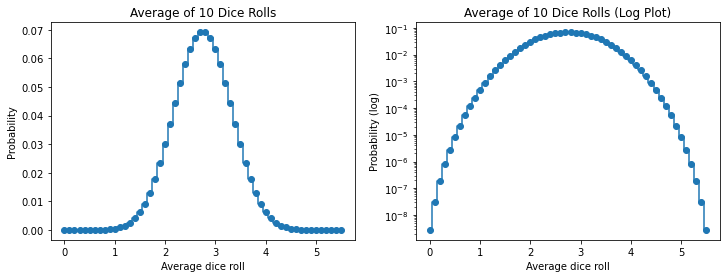

In [4]:
dice_prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
probs = np.convolve(dice_prob,dice_prob)
n = 1

for i in range(9):
    probs = np.convolve(probs, dice_prob)
sums = np.arange(0, len(probs), 1)

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].step(sums / 10, probs, 'o-', where = 'mid')
ax[1].step(sums / 10, probs, 'o-', where = 'mid')
ax[1].set_yscale('log')

ax[0].set_xlabel("Average dice roll")
ax[0].set_ylabel("Probability")
ax[0].set_title("Average of 10 Dice Rolls")

ax[1].set_xlabel("Average dice roll")
ax[1].set_ylabel("Probability (log)")
ax[1].set_title("Average of 10 Dice Rolls (Log Plot)")

The above distributions are Gaussian in shape, but are not completely Gaussian because they are discrete. As you can see in the semi-log plot, the resulting distribution is (or is very close to) an upside down parabola. This is characteristic of Gaussians. We see in the non-log plot that the distribution is bell-shaped, with a central mean, another characteristic of a Gaussian. However, Gaussians are continuous functions, allowing all values. The graphs here are discrete- you can only get specific allowed values for the averages of 10 dice. However, as more dice are averaged, these values become closer and closer to a continuous, and Gaussian, distribution.

# Question 5

Mean of original is -3.64547818608495e-17, standard deviation of original is 0.9994923430270855.
Mean of sum is -9.349289000067162e-20, standard deviation of sum is 0.050012141778287694.
Mean of average is -2.3373222500167904e-20, standard deviation of average is 0.017681962296545135.


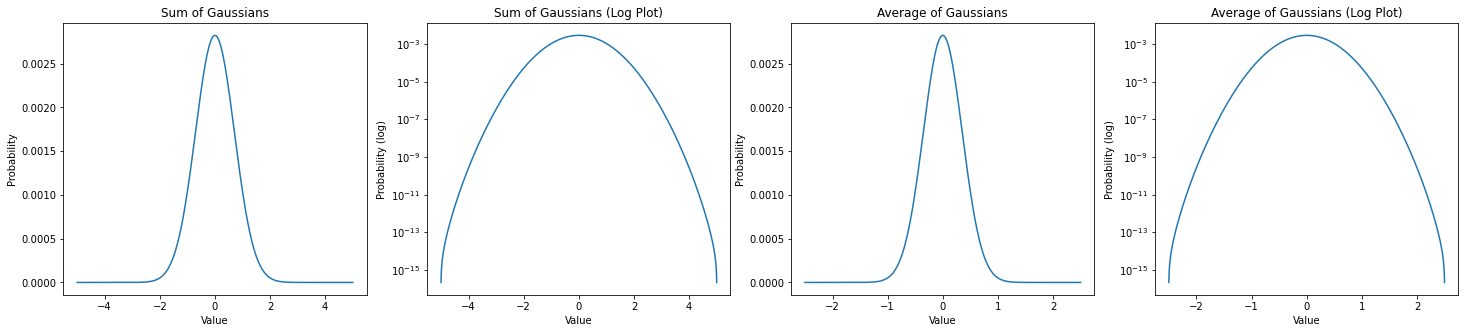

In [5]:
k = np.linspace(-5, 5, 1000)
original = stats.norm.pdf(k, loc = 0, scale = 1)

new = np.convolve(original,original)
new = new / sum(new)
k_new = np.linspace(-5, 5, len(new))

dx = (k.max() - k.min()) / len(k)
dx_new = (k_new.max() - k_new.min()) / len(k_new)
dx_av = ((k_new / 2).max() - (k_new / 2).min()) / len(k_new)

fig, ax = plt.subplots(1, 4, figsize=(25,5))

ax[0].plot(k_new, new)
ax[1].semilogy(k_new, new)
ax[2].plot(k_new / 2, new)
ax[3].semilogy(k_new / 2, new)

ax[0].set_xlabel("Value")
ax[0].set_ylabel("Probability")
ax[0].set_title("Sum of Gaussians")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Probability (log)")
ax[1].set_title("Sum of Gaussians (Log Plot)")

ax[2].set_xlabel("Value")
ax[2].set_ylabel("Probability")
ax[2].set_title("Average of Gaussians")
ax[3].set_xlabel("Value")
ax[3].set_ylabel("Probability (log)")
ax[3].set_title("Average of Gaussians (Log Plot)")

mean = np.sum(k@original) * dx
av_squares = np.sum((k**2)@original) * dx
stand_dev = np.sqrt(av_squares-(mean**2))

mean_new = np.sum(k_new@new) * dx_new
av_squares_new = np.sum((k_new**2)@new) * dx_new
stand_dev_new = np.sqrt(av_squares_new-(mean_new**2))

mean_av = np.sum((k_new / 2)@new) * dx_av
av_squares_av = np.sum(((k_new / 2)**2)@new) * dx_av
stand_dev_av = np.sqrt(av_squares_av - (mean_av**2))

print('Mean of original is ' + str(mean) + ', standard deviation of original is ' + str(stand_dev) + '.')
print('Mean of sum is ' + str(mean_new) + ', standard deviation of sum is ' + str(stand_dev_new) + '.')
print('Mean of average is ' + str(mean_av) + ', standard deviation of average is ' + str(stand_dev_av) + '.')

As you can see above, the sum of two Gaussians is Gaussian. The mean stayed the same (zero given rounding/numerical errors), but the standard deviation decreased quite significantly- from .1 to .05. The average also follows this trend- the mean stayed about 0, the average went down to .17. This means that as you integrate a signal over time (averaging many signals together from many readings), you get something that leans heavier towards the average distribution. This makes fluxes from the average distribution easier to see, or in other words, less likely to occur from just background noise.